# Pre-Trained Models

## Image Classification

In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

### AlexNet

In [3]:
alexnet = models.AlexNet()

In [4]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### ResNet

In [5]:
resnet = models.resnet101(pretrained=True)

In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Transforms

In [7]:
from torchvision import transforms

In [8]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

### Inference

In [9]:
from PIL import Image
import glob
import torch

In [10]:
resnet.eval();

In [11]:
with open('../data/01/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [12]:
for i, img_path in enumerate(glob.glob('../data/01/*.jpg')):
    img = Image.open(img_path)
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out = resnet(batch_t)
    confidence = torch.softmax(out, 1)[0] * 100
    _, indices = torch.sort(out, descending=True)
    if not i:
        print(img)
        print(img_t.shape)
        print(batch_t.shape)
        print(out.shape)
        print()
    print(img_path.split('/')[-1])
    [print('\t', labels[idx], confidence[idx].item()) for idx in indices[0][:5]]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3840x2160 at 0x7F39D125D640>
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 1000])

bucket.jpg
	 acorn 17.596139907836914
	 barrel, cask 16.322542190551758
	 wine bottle 10.084877014160156
	 bucket, pail 8.460363388061523
	 bonnet, poke bonnet 7.219382286071777
horse.jpg
	 sorrel 98.04434204101562
	 Arabian camel, dromedary, Camelus dromedarius 1.4567869901657104
	 cowboy hat, ten-gallon hat 0.1088467538356781
	 cowboy boot 0.04054176062345505
	 barrel, cask 0.034320682287216187
dog2.jpg
	 Siamese cat, Siamese 45.04359817504883
	 malinois 11.697639465332031
	 sliding door 7.506349563598633
	 llama 3.6024551391601562
	 lynx, catamount 3.332749843597412
dog1.jpg
	 Siamese cat, Siamese 49.765865325927734
	 Chihuahua 20.383766174316406
	 French bulldog 9.373309135437012
	 pug, pug-dog 5.436741352081299
	 Italian greyhound 3.3534042835235596
horse2.jpg
	 standard poodle 20.873624801635742
	 Mexican hairless 14.849

## GAN

In [23]:
from cycle_gan import ResNetGenerator

In [14]:
net_G = ResNetGenerator()

In [15]:
model_path = '../data/01/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
net_G.load_state_dict(model_data)

<All keys matched successfully>

In [16]:
net_G.eval();

In [17]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

In [18]:
import matplotlib.pyplot as plt

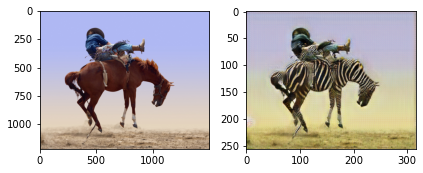

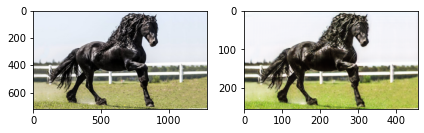

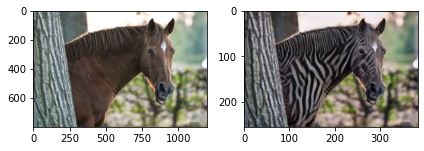

In [19]:
for i, img_path in enumerate(glob.glob('../data/01/horse*.jpg')):
    img = Image.open(img_path)
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out = net_G(batch_t)
    out_t = (out.data.squeeze() + 1.0) / 2.0
    out_img = transforms.ToPILImage()(out_t)
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.imshow(out_img)
    plt.tight_layout()
    plt.show()

## Torch Hub

In [20]:
from torch import hub

In [21]:
# error importing
# resnet_18_model = hub.load(
#     'pytorch/vision:master',
#     model='resnet18',
#     pretrained=True
# )